# Laboratorio 09 Matrices

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

## Punto 1: **Modelo de encriptación**


Un proceso para encriptar un mensaje secreto es usar cierta matriz cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc. y espacio=27, se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamaño de la matriz de código, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.

La persona que debe recibir el mensaje conoce la matriz de código. El o ella arreglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el número de elementos en una fila conicide con el tamaño de la matriz de código multiplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

```
47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588,
```


la primera fila del mensaje es `47,49,-19,257,487`

*¿Cual es el mensaje?*

In [10]:
import numpy as np
import sympy as sp

# Matriz de codificación A
A = np.array([
    [1, 2, -3, 4, 5],
    [-2, -5, 8, -8, -9],
    [1, 2, -2, 7, 9],
    [1, 1, 0, 6, 12],
    [2, 4, -6, 8, 11]
])

# Calcular la inversa de A usando SymPy (para precisión)
A_sym = sp.Matrix(A)
A_inv_sym = A_sym.inv()
A_inv = np.array(A_inv_sym).astype(float)  # Convertir a matriz NumPy

# Mensaje cifrado
mensaje_cifrado = [
    47, 49, -19, 257, 487,
    10, -9, 63, 137, 236,
    79, 142, -184, 372, 536,
    59, 70, -40, 332, 588
]

# Organizar el mensaje en una matriz 4x5
M = np.array(mensaje_cifrado).reshape(4, 5)

# Multiplicar M por la inversa de A
M_decodificada = np.round(M @ A_inv).astype(int)

# Mapear números a letras
def numero_a_letra(num):
    if num == 27:
        return ' '
    return chr(num + 64)

# Convertir la matriz decodificada a texto
mensaje = ''
for fila in M_decodificada:
    for num in fila:
        mensaje += numero_a_letra(num)

print("Mensaje descifrado:", mensaje)

Mensaje descifrado: ARE YOU HAVING FUN  


## Punto 2: **Operaciones matricial con regresión lineal.**

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y minimizar el conjunto de parámetros de la regresión emplando algún método de minimización; otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


$$\Theta = (X^T X)^{-1} X^T y$$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, $X$ la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en $N$ dimensiones; la recta, plano o hiperplano puede ser calculado como:

$$Y=\Theta^T X$$


En el caso de dos dimensiones, supongamos que $X$, e $Y$ presentan un comportamiento lineal, y vienen dados por (en este caso el super indice es):


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

$$\Theta = (X^T X)^{-1} X^T y$$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```

Teta: [48.15916457 -9.65698378]


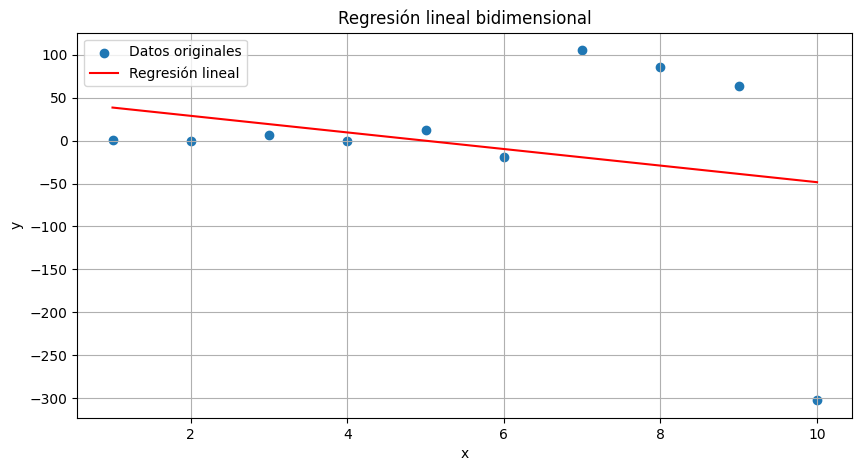

Theta (generalizado): [0.07713664 0.09909608 0.03960565]


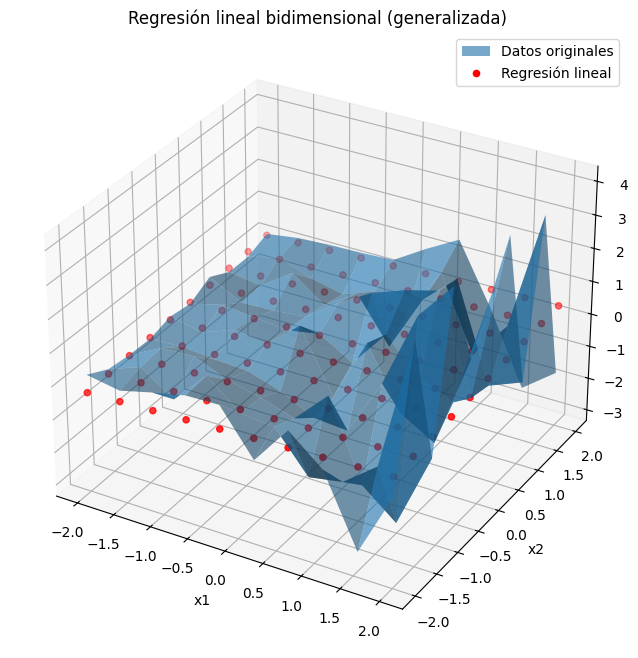

In [26]:

from mpl_toolkits.mplot3d import Axes3D

# Problema bidimensional 1
n = 10
x = np.linspace(1, n, n)
noise1 = 2 * np.random.random(n) - 1
noise2 = 2 * np.random.random(n) - 1
y = 2**x * noise1 - 3**x * noise2 * 0.01

# Matriz X con una columna de 1s para el término independiente (teta0)
X = np.column_stack((np.ones(n), x))

# Cálculo de teta
teta = np.linalg.inv(X.T @ X) @ X.T @ y

print("Teta:", teta)

# Predicciones
y_pred = X @ teta

# Gráfica
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Datos originales')
plt.plot(x, y_pred, color='red', label='Regresión lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión lineal bidimensional')
plt.legend()
plt.grid(True)
plt.show()

# Problema bidimensional 2 (generalización)
n = 10
x1 = np.linspace(-2, 2, n)
x2 = np.linspace(-2, 2, n)
x1_grid, x2_grid = np.meshgrid(x1, x2)
noise1 = 2 * np.random.random((n, n)) - 1
noise2 = 2 * np.random.random((n, n)) - 1
y = 2**x1_grid * noise1 - 3**x2_grid * noise2 * 0.01

# Matriz X con una columna de 1s para el término independiente
X = np.column_stack((x1_grid.flatten(), x2_grid.flatten(), np.ones(n*n)))

# Cálculo de teta
teta = np.linalg.inv(X.T @ X) @ X.T @ y.flatten()

print("Theta (generalizado):", teta)

# Predicciones
y_pred = X @ teta

# Gráfica 3D del problema generalizado
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_grid, x2_grid, y, alpha=0.6, label='Datos originales')
ax.scatter(x1_grid.flatten(), x2_grid.flatten(), y_pred, color='red', label='Regresión lineal')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Regresión lineal bidimensional (generalizada)')
ax.legend()
plt.show()

## Punto 3: **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

a) Diagonalize $A$.

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

In [9]:

import scipy.linalg as la
import matplotlib.pyplot as plt

# Definición de la matriz A
A = np.array([[2, -1, 1],
              [0, 3, -1],
              [2, 1, 3]])

# Diagonalización de A
eigenvalues, eigenvectors = la.eig(A)

# Matriz diagonal D
D = np.diag(eigenvalues)

# Matriz de cambio de base U (eigenvectores)
U = eigenvectors

# Inversa de U
U_inv = la.inv(U)

print("Matriz A:\n", A)
print("\nValores propios:\n", eigenvalues)
print("\nMatriz diagonal D:\n", D)


Matriz A:
 [[ 2 -1  1]
 [ 0  3 -1]
 [ 2  1  3]]

Valores propios:
 [4.+0.00000000e+00j 2.+1.68652966e-08j 2.-1.68652966e-08j]

Matriz diagonal D:
 [[4.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 2.+1.68652966e-08j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 2.-1.68652966e-08j]]


In [6]:
def solve_system(A, t, r0):
    """Resuelve el sistema r' = Ar utilizando la fórmula f(A) = Uf(D)U^{-1}."""
    eigenvalues, eigenvectors = la.eig(A)
    D = np.diag(eigenvalues)
    U = eigenvectors
    U_inv = la.inv(U)

    e_Dt = np.diag(np.exp(eigenvalues * t))
    e_At = U @ e_Dt @ U_inv

    return e_At @ r0

# Condiciones iniciales
r0 = np.array([1, 1, 2])

# Intervalo de tiempo
t_values = np.linspace(0, 2, 100)

# Solución para cada tiempo
solutions = [solve_system(A, t, r0) for t in t_values]
x_values, y_values, z_values = zip(*solutions)

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


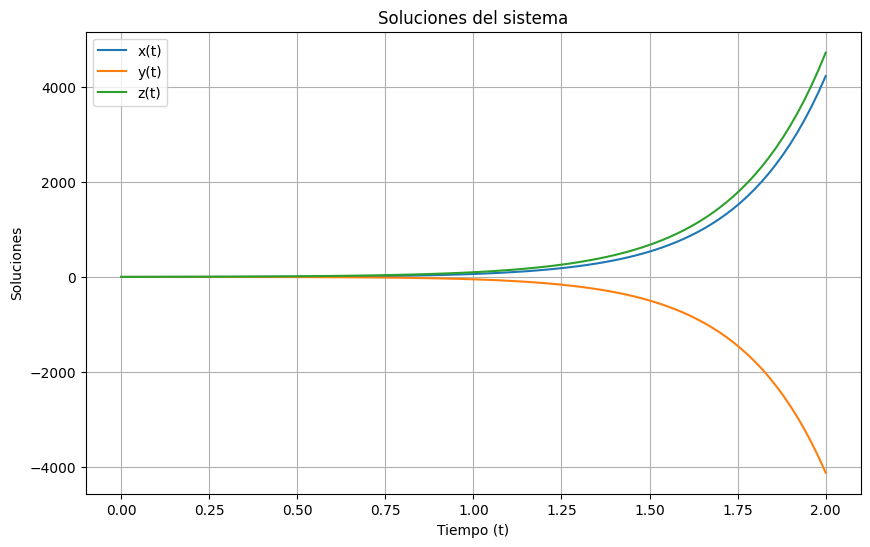

In [7]:
# Gráfica de las soluciones
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label='x(t)')
plt.plot(t_values, y_values, label='y(t)')
plt.plot(t_values, z_values, label='z(t)')
plt.xlabel('Tiempo (t)')
plt.ylabel('Soluciones')
plt.title('Soluciones del sistema')
plt.legend()
plt.grid(True)
plt.show()

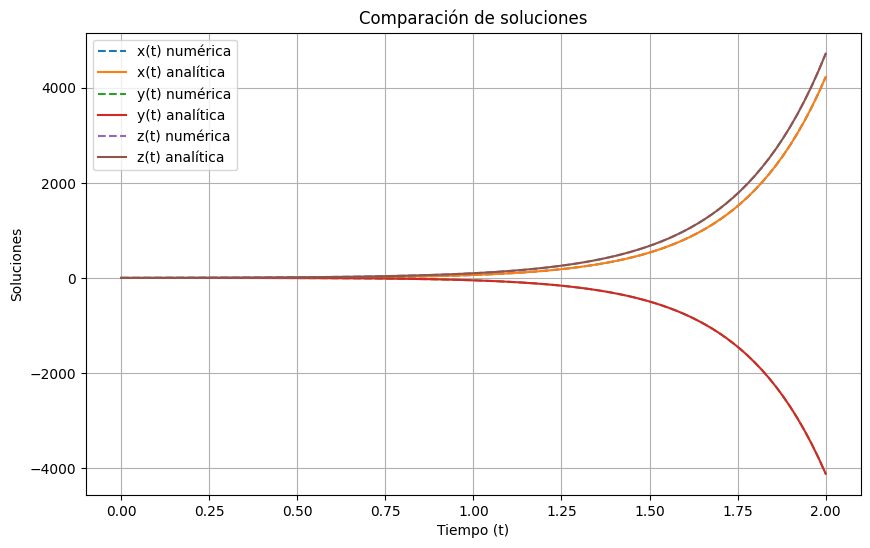

In [8]:
def analytical_solution(t, r0):
    x0, y0, z0 = r0

    x = 0.5 * (x0 * (np.exp(2*t) * (1 + np.exp(2*t) - 2*t)) +
               y0 * (-2 * t * np.exp(2*t)) +
               z0 * (np.exp(2*t) * (-1 + np.exp(2*t))))

    y = 0.5 * (x0 * (-np.exp(2*t) * (-1 + np.exp(2*t) - 2*t)) +
               y0 * (2 * (t + 1) * np.exp(2*t)) +
               z0 * (-np.exp(2*t) * (-1 + np.exp(2*t))))

    z = 0.5 * (x0 * (np.exp(2*t) * (-1 + np.exp(2*t) + 2*t)) +
               y0 * (2 * t * np.exp(2*t)) +
               z0 * (np.exp(2*t) * (1 + np.exp(2*t))))

    return x, y, z

# Solución analítica
analytical_solutions = [analytical_solution(t, r0) for t in t_values]
x_analytical, y_analytical, z_analytical = zip(*analytical_solutions)

# Gráfica de comparación
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label='x(t) numérica', linestyle='--')
plt.plot(t_values, x_analytical, label='x(t) analítica')
plt.plot(t_values, y_values, label='y(t) numérica', linestyle='--')
plt.plot(t_values, y_analytical, label='y(t) analítica')
plt.plot(t_values, z_values, label='z(t) numérica', linestyle='--')
plt.plot(t_values, z_analytical, label='z(t) analítica')
plt.xlabel('Tiempo (t)')
plt.ylabel('Soluciones')
plt.legend()
plt.show()


#Las soluuciones son muy parecidad aunque es preferible simepre usar las analiticas mientras sea posible, para no sacrificar presición

## Punto 4: **Modelo de población de una especie de pajaros**
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1)
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que:

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix}
0 & 2 \\
0.3 & 0.5
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A

In [14]:


# Matriz A
A = np.array([[0, 2],
              [0.3, 0.5]])

# Población inicial
Pa0 = 10  # 10 hembras adultas
Pj0 = 0   # Sin jóvenes iniciales
P0 = np.array([Pj0, Pa0])

# Datos
num_years = 20
populations = [P0]
ratios = []

for n in range(1, num_years + 1):
    Pn = A @ populations[-1]
    populations.append(Pn)

    Pj_n, Pa_n = Pn
    ratio = Pj_n / Pa_n
    ratios.append(ratio)

    print(f"Año {n}: Pj = {int(Pj_n)}, Pa = {int(Pa_n)}, Ratio = {ratio:.2f}")

# Mostrar la convergencia de la razón
print("\nRazones Pj/Pa:")
for i, ratio in enumerate(ratios):
    print(f"Año {i+1}: {ratio:.2f}")

Año 1: Pj = 20, Pa = 5, Ratio = 4.00
Año 2: Pj = 10, Pa = 8, Ratio = 1.18
Año 3: Pj = 17, Pa = 7, Ratio = 2.34
Año 4: Pj = 14, Pa = 8, Ratio = 1.66
Año 5: Pj = 17, Pa = 8, Ratio = 2.00
Año 6: Pj = 17, Pa = 9, Ratio = 1.82
Año 7: Pj = 19, Pa = 10, Ratio = 1.91
Año 8: Pj = 20, Pa = 10, Ratio = 1.86
Año 9: Pj = 21, Pa = 11, Ratio = 1.89
Año 10: Pj = 22, Pa = 12, Ratio = 1.87
Año 11: Pj = 24, Pa = 12, Ratio = 1.88
Año 12: Pj = 25, Pa = 13, Ratio = 1.88
Año 13: Pj = 27, Pa = 14, Ratio = 1.88
Año 14: Pj = 29, Pa = 15, Ratio = 1.88
Año 15: Pj = 31, Pa = 16, Ratio = 1.88
Año 16: Pj = 33, Pa = 17, Ratio = 1.88
Año 17: Pj = 35, Pa = 18, Ratio = 1.88
Año 18: Pj = 37, Pa = 19, Ratio = 1.88
Año 19: Pj = 39, Pa = 21, Ratio = 1.88
Año 20: Pj = 42, Pa = 22, Ratio = 1.88

Razones Pj/Pa:
Año 1: 4.00
Año 2: 1.18
Año 3: 2.34
Año 4: 1.66
Año 5: 2.00
Año 6: 1.82
Año 7: 1.91
Año 8: 1.86
Año 9: 1.89
Año 10: 1.87
Año 11: 1.88
Año 12: 1.88
Año 13: 1.88
Año 14: 1.88
Año 15: 1.88
Año 16: 1.88
Año 17: 1.88
Año 18:

In [20]:
# Valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(A)

print("\nValores propios:", eigenvalues)
print("Vectores propios:", eigenvectors)

# Ordenar los valores propios de mayor a menor
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

print("\nValores propios ordenados:", eigenvalues)
print("Vectores propios ordenados:", eigenvectors)

# Calcular los coeficientes alfa1 y alfa2
v1 = eigenvectors[:, 0]
v2 = eigenvectors[:, 1]

# Resolver el sistema P0 = alfa1*v1 + alfa2*v2
coeffs = np.linalg.solve(eigenvectors, P0)
alfa1, alfa2 = coeffs

print("\nCoeficientes alfa1 y alfa2:", alfa1, alfa2)


Valores propios: [-0.56394103  1.06394103]
Vectores propios: [[-0.96246998 -0.88285203]
 [ 0.27138816 -0.46965125]]

Valores propios ordenados: [ 1.06394103 -0.56394103]
Vectores propios ordenados: [[-0.88285203 -0.96246998]
 [-0.46965125  0.27138816]]

Coeficientes alfa1 y alfa2: -13.916151217678742 12.764971949503218


In [22]:
# Solución general
def general_solution(n, alpha1, alpha2, eigenvalues, eigenvectors):
    lambda1, lambda2 = eigenvalues
    v1, v2 = eigenvectors[:, 0], eigenvectors[:, 1]

    Pn = alpha1 * (lambda1**n) * v1 + alpha2 * (lambda2**n) * v2
    return Pn

# Calcular la población para cada año usando la solución general
populations_general = [P0]
ratios_general = []

for n in range(1, num_years + 1):
    Pn = general_solution(n, alfa1, alfa2, eigenvalues, eigenvectors)
    populations_general.append(Pn)

    Pj_n, Pa_n = Pn
    ratio = Pj_n / Pa_n
    ratios_general.append(ratio)

    print(f"Año {n}: Pj = {int(Pj_n)}, Pa = {int(Pa_n)}, Ratio = {ratio:.2f} (General)")

# Mostrar la convergencia de la razón usando la solución general
print("\nRazones Pj/Pa:")
for i, ratio in enumerate(ratios_general):
    print(f"Año {i+1}: {ratio:.2f}")

Año 1: Pj = 19, Pa = 4, Ratio = 4.00 (General)
Año 2: Pj = 9, Pa = 8, Ratio = 1.18 (General)
Año 3: Pj = 17, Pa = 7, Ratio = 2.34 (General)
Año 4: Pj = 14, Pa = 8, Ratio = 1.66 (General)
Año 5: Pj = 17, Pa = 8, Ratio = 2.00 (General)
Año 6: Pj = 17, Pa = 9, Ratio = 1.82 (General)
Año 7: Pj = 19, Pa = 10, Ratio = 1.91 (General)
Año 8: Pj = 20, Pa = 10, Ratio = 1.86 (General)
Año 9: Pj = 21, Pa = 11, Ratio = 1.89 (General)
Año 10: Pj = 22, Pa = 12, Ratio = 1.87 (General)
Año 11: Pj = 24, Pa = 12, Ratio = 1.88 (General)
Año 12: Pj = 25, Pa = 13, Ratio = 1.88 (General)
Año 13: Pj = 27, Pa = 14, Ratio = 1.88 (General)
Año 14: Pj = 29, Pa = 15, Ratio = 1.88 (General)
Año 15: Pj = 31, Pa = 16, Ratio = 1.88 (General)
Año 16: Pj = 33, Pa = 17, Ratio = 1.88 (General)
Año 17: Pj = 35, Pa = 18, Ratio = 1.88 (General)
Año 18: Pj = 37, Pa = 19, Ratio = 1.88 (General)
Año 19: Pj = 39, Pa = 21, Ratio = 1.88 (General)
Año 20: Pj = 42, Pa = 22, Ratio = 1.88 (General)

Razones Pj/Pa:
Año 1: 4.00
Año 2: 1

#Punto 5: Sistemas de ecuaciones
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

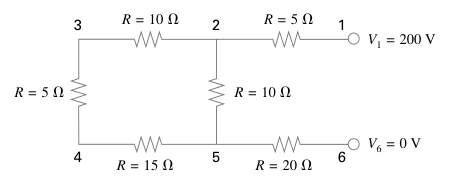

In [24]:
#Escribimos las leyes de kirckcoff para este caso, como queda uns sitema de ecuaciones lineales entonces podemos escribirlo de manera matricial de la siguiente manera
# Matriz de coeficientes
A = np.array([
    [1, -1, -1, 0, 0, 0],
    [0, 0, 1, 1, -1, 0],
    [0, 0, 0, 0, 1, -1],
    [5, 0, 10, 15, 0, 0],
    [0, 10, -10, 15, 0, 0],
    [0, 10, 0, 0, 0, -20]
])

# Vector de términos independientes, voltaje
b = np.array([0, 0, 0, 200, 0, 0])

# Resolver el sistema
I = np.linalg.solve(A, b)

print("Corrientes en cada nodo:")
print("I1 =", I[0], "A")
print("I2 =", I[1], "A")
print("I3 =", I[2], "A")
print("I4 =", I[3], "A")
print("I5 =", I[4], "A")
print("I6 =", I[5], "A")

Corrientes:
I1 = 27.2 A
I2 = 16.0 A
I3 = 11.2 A
I4 = -3.2 A
I5 = 8.0 A
I6 = 8.0 A
